In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
import cpi


In [10]:
# run only when needed - for stability of results
cpi.update()

In [11]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

Importing plotly failed. Interactive plots will not work.


In [12]:
# Right after importing seaborn (could also use 'whitegrid')
sns.set_theme(style='whitegrid', context='talk')

# 1. Cleaning
---
---

## Which codes do relate to lobsters?

From : https://www.ic.gc.ca/app/scr/tdst/tdo/crtr.html?grouped=INDIVIDUAL&searchType=KS_CS&naArea=9999&countryList=ALL&toFromCountry=CDN&reportType=TE&timePeriod=5%7CComplete+Years&currency=CDN&productType=HS6&hSelectedCodes=%7C10600%7C30611%7C30612%7C30615%7C30621%7C30622%7C30625%7C30631%7C30632%7C30634%7C30691%7C30692%7C30694%7C160530&runReport=true

Searched for all codes containing word "lobster"

In [14]:
# perform cleaning set on combined data set
def cleaning_steps(df_name):
    # make lower case
    df_name['Commodity'] = df_name['Commodity'].str.lower()
    # keep only commodities that mention 'lobster'
    df_name = df_name[df_name['Commodity'].str.contains('lobster')].reset_index(drop=True)
    # drop extra columns
    df_name = df_name.drop(columns = ['Unit of measure'])
    # rename columns
    new_col_names = {'Value ($)': 'Value', 'Quantity': 'Quantity_kg'}
    df_name = df_name.rename(columns=new_col_names)
    # update period to datetime object
    df_name['Period'] = pd.to_datetime(df_name['Period'])
    # adjust value to todays dolars
    df_name['Value_today'] = cpi.inflate(df_name['Value'], df_name['Period'].year, to=2023, currency='CAD')
    return df_name



## Simple Data Set

* no specific country, no specific province of origin

In [4]:
# load 0306
# path_0306 = '/content/drive/MyDrive/0.Bootcamp/1._Data_Course/lighthouse-data-notes/9_Final_Project/data/0306_88Jan_to_23Sep_Wld_CT_Monthly.csv'

# #colab
# df_0306_simple = pd.read_csv(path_0306, engine = 'python', skipfooter = 3,index_col=False, header = 1)


# jlab
df_0306_simple = pd.read_csv('data/0306_88Jan_to_23Sep_Wld_CT_Monthly.csv', engine = 'python', skipfooter = 3,index_col=False, header = 1)
df_0306_simple

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2013-05-01,"0306.11.00 - Rock lobster & o sea crawfish,frz...",Canada,The world,NaN,227118,18337,Weight in kilograms
1,2013-08-01,"0306.12.10 - Lobsters, in brine, frozen",Canada,The world,NaN,6096257,352791,Weight in kilograms
2,2014-10-01,"0306.11.00 - Rock lobster & o sea crawfish,frz...",Canada,The world,NaN,58865,11476,Weight in kilograms
3,2016-01-01,"0306.11.00 - Rock lobster & o sea crawfish,frz...",Canada,The world,NaN,747713,26403,Weight in kilograms
4,2016-06-01,"0306.12.10 - Lobsters, in brine, frozen",Canada,The world,NaN,14776670,702317,Weight in kilograms
...,...,...,...,...,...,...,...,...
5731,2006-10-01,"0306.23.20 - Shrimps and prawns, not frozen, p...",Canada,The world,NaN,198,5,Weight in kilograms
5732,2008-09-01,"0306.23.20 - Shrimps and prawns, not frozen, p...",Canada,The world,NaN,3506,398,Weight in kilograms
5733,1989-12-01,"0306.23.00 - Shrimps and prawns, not frozen, i...",Canada,The world,NaN,51782,5100,Weight in kilograms
5734,1990-12-01,"0306.23.00 - Shrimps and prawns, not frozen, i...",Canada,The world,NaN,73569,9980,Weight in kilograms


In [5]:
# load 1605

# # colab
# path_1605 = '/content/drive/MyDrive/0.Bootcamp/1._Data_Course/lighthouse-data-notes/9_Final_Project/data/1605_88Jan_to_23Sep_Wld_CT_Monthly.csv'

# df_1605_simple = pd.read_csv(path_1605, engine = 'python', skipfooter = 3,index_col=False, header = 1)


# jlab
df_1605_simple = pd.read_csv('data/1605_88Jan_to_23Sep_Wld_CT_Monthly.csv', engine = 'python', skipfooter = 3,index_col=False, header = 1)
df_1605_simple

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2017-10-01,"1605.10.10 - Snow (Queen) crab, prepared or pr...",Canada,The world,NaN,431643,26816,Weight in kilograms
1,2018-08-01,"1605.10.10 - Snow (Queen) crab, prepared or pr...",Canada,The world,NaN,487996,21707,Weight in kilograms
2,2019-06-01,"1605.10.10 - Snow (Queen) crab, prepared or pr...",Canada,The world,NaN,720467,30891,Weight in kilograms
3,2019-09-01,"1605.10.10 - Snow (Queen) crab, prepared or pr...",Canada,The world,NaN,20362,1143,Weight in kilograms
4,2019-10-01,"1605.10.10 - Snow (Queen) crab, prepared or pr...",Canada,The world,NaN,558143,14220,Weight in kilograms
...,...,...,...,...,...,...,...,...
5191,2007-06-01,"1605.40.20 - Crustaceans, nes, prepared or pre...",Canada,The world,NaN,24708,1887,Weight in kilograms
5192,1990-01-01,"1605.40.90 - Crustaceans, nes, prepared or pre...",Canada,The world,NaN,2920,400,Weight in kilograms
5193,2004-09-01,"1605.40.90 - Crustaceans, nes, prepared or pre...",Canada,The world,NaN,550,51,Weight in kilograms
5194,2012-02-01,"1605.54.00 - Cuttle fish and squid, prepared o...",Canada,The world,NaN,130284,12438,Weight in kilograms


In [18]:
## Concat both DF into one data set
df_simple = pd.concat([df_1605_simple, df_0306_simple], axis = 0, ignore_index = True) # stack vertically
df_simple

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2017-10-01,"1605.10.10 - Snow (Queen) crab, prepared or pr...",Canada,The world,NaN,431643,26816,Weight in kilograms
1,2018-08-01,"1605.10.10 - Snow (Queen) crab, prepared or pr...",Canada,The world,NaN,487996,21707,Weight in kilograms
2,2019-06-01,"1605.10.10 - Snow (Queen) crab, prepared or pr...",Canada,The world,NaN,720467,30891,Weight in kilograms
3,2019-09-01,"1605.10.10 - Snow (Queen) crab, prepared or pr...",Canada,The world,NaN,20362,1143,Weight in kilograms
4,2019-10-01,"1605.10.10 - Snow (Queen) crab, prepared or pr...",Canada,The world,NaN,558143,14220,Weight in kilograms
...,...,...,...,...,...,...,...,...
10927,2006-10-01,"0306.23.20 - Shrimps and prawns, not frozen, p...",Canada,The world,NaN,198,5,Weight in kilograms
10928,2008-09-01,"0306.23.20 - Shrimps and prawns, not frozen, p...",Canada,The world,NaN,3506,398,Weight in kilograms
10929,1989-12-01,"0306.23.00 - Shrimps and prawns, not frozen, i...",Canada,The world,NaN,51782,5100,Weight in kilograms
10930,1990-12-01,"0306.23.00 - Shrimps and prawns, not frozen, i...",Canada,The world,NaN,73569,9980,Weight in kilograms


In [20]:
df_simple = cleaning_steps(df_simple)
df_simple

,Period,Commodity,Value_$,Quantity_kg
0,2017-11-01,"1605.30.10 - lobster, prepared or preserved, f...",26950137,619951
1,2019-12-01,"1605.30.10 - lobster, prepared or preserved, f...",42537812,863326
2,2021-01-01,"1605.30.10 - lobster, prepared or preserved, f...",24817872,562014
3,2021-03-01,"1605.30.10 - lobster, prepared or preserved, f...",8205605,148908
4,2021-09-01,"1605.30.10 - lobster, prepared or preserved, f...",74046708,1091663
...,...,...,...,...
3565,2004-03-01,0306.11.00 - rock lobster & other sea crawfish...,222094,29992
3566,2004-05-01,0306.11.00 - rock lobster & other sea crawfish...,314942,44161
3567,2004-06-01,0306.11.00 - rock lobster & other sea crawfish...,16219,1553
3568,2004-07-01,0306.11.00 - rock lobster & other sea crawfish...,46964,3629


In [76]:
df_simple.dtypes

Period         datetime64[ns]
Commodity              object
Value_$                 int64
Quantity_kg             int64
dtype: object

In [23]:
len(pd.DataFrame(df_simple['Commodity'].value_counts()))

31

In [9]:
# export clean simple data for reuse

df_simple.to_csv('data/data_simple_clean.csv')


In [ ]:
df_simple['Commodity'].count_va

In [10]:
df_quantity = df_simple[['Period','Quantity_kg']].copy()
df_quantity

,Period,Quantity_kg
0,2017-11-01,619951
1,2019-12-01,863326
2,2021-01-01,562014
3,2021-03-01,148908
4,2021-09-01,1091663
...,...,...
3565,2004-03-01,29992
3566,2004-05-01,44161
3567,2004-06-01,1553
3568,2004-07-01,3629


In [11]:
df_value = df_simple[['Period','Value_$']].copy()
df_value

,Period,Value_$
0,2017-11-01,26950137
1,2019-12-01,42537812
2,2021-01-01,24817872
3,2021-03-01,8205605
4,2021-09-01,74046708
...,...,...
3565,2004-03-01,222094
3566,2004-05-01,314942
3567,2004-06-01,16219
3568,2004-07-01,46964


In [12]:
df_quantity = df_simple[['Period','Quantity_kg']].copy()
df_quantity

,Period,Quantity_kg
0,2017-11-01,619951
1,2019-12-01,863326
2,2021-01-01,562014
3,2021-03-01,148908
4,2021-09-01,1091663
...,...,...
3565,2004-03-01,29992
3566,2004-05-01,44161
3567,2004-06-01,1553
3568,2004-07-01,3629


In [13]:
df_simple

,Period,Commodity,Value_$,Quantity_kg
0,2017-11-01,"1605.30.10 - lobster, prepared or preserved, f...",26950137,619951
1,2019-12-01,"1605.30.10 - lobster, prepared or preserved, f...",42537812,863326
2,2021-01-01,"1605.30.10 - lobster, prepared or preserved, f...",24817872,562014
3,2021-03-01,"1605.30.10 - lobster, prepared or preserved, f...",8205605,148908
4,2021-09-01,"1605.30.10 - lobster, prepared or preserved, f...",74046708,1091663
...,...,...,...,...
3565,2004-03-01,0306.11.00 - rock lobster & other sea crawfish...,222094,29992
3566,2004-05-01,0306.11.00 - rock lobster & other sea crawfish...,314942,44161
3567,2004-06-01,0306.11.00 - rock lobster & other sea crawfish...,16219,1553
3568,2004-07-01,0306.11.00 - rock lobster & other sea crawfish...,46964,3629


/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/sea

<Axes: xlabel='Period', ylabel='Value_$'>

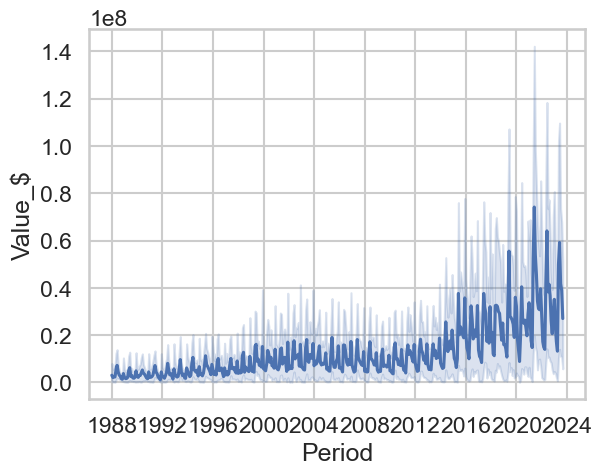

In [14]:
# sns.lineplot(x = df_simple['Period'], y=df_simple['Quantity_kg'])
sns.lineplot(x = df_simple['Period'], y=df_simple['Value_$'])

In [15]:
df_quantity.groupby(df_quantity['Period'].dt.year).mean()

,Period,Quantity_kg
Period,,
1988,1988-06-24 04:11:39.029126272,2.791339e+05
1989,1989-06-14 03:52:43.636363648,2.406205e+05
1990,1990-06-15 19:45:00.000000000,3.165200e+05
1991,1991-06-23 17:14:33.786407808,3.026538e+05
1992,1992-06-19 03:01:44.854368896,2.749710e+05
1993,1993-06-25 19:21:17.419354880,2.917434e+05
1994,1994-06-19 22:30:00.000000000,3.393518e+05
1995,1995-06-13 18:33:24.123711360,3.296641e+05
1996,1996-06-24 12:55:23.076923136,3.062868e+05


In [16]:
df_simple

,Period,Commodity,Value_$,Quantity_kg
0,2017-11-01,"1605.30.10 - lobster, prepared or preserved, f...",26950137,619951
1,2019-12-01,"1605.30.10 - lobster, prepared or preserved, f...",42537812,863326
2,2021-01-01,"1605.30.10 - lobster, prepared or preserved, f...",24817872,562014
3,2021-03-01,"1605.30.10 - lobster, prepared or preserved, f...",8205605,148908
4,2021-09-01,"1605.30.10 - lobster, prepared or preserved, f...",74046708,1091663
...,...,...,...,...
3565,2004-03-01,0306.11.00 - rock lobster & other sea crawfish...,222094,29992
3566,2004-05-01,0306.11.00 - rock lobster & other sea crawfish...,314942,44161
3567,2004-06-01,0306.11.00 - rock lobster & other sea crawfish...,16219,1553
3568,2004-07-01,0306.11.00 - rock lobster & other sea crawfish...,46964,3629


## Complete Data Set
- showing province of origin and destination country

In [3]:
# jlab
path_1605 = 'data/full_data/1605_88Jan_to_23Sep_ATP_PV_Monthly.csv'
df_1605_full = pd.read_csv(path_1605, engine = 'python', skipfooter = 3,index_col=False, header = 1)
df_1605_full.head()

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2013-04-01,"1605.21.00 - Shrimps and prawns, prepared or p...",Newfoundland and Labrador,United States,California,195111,29802,Weight in kilograms
1,2013-12-01,"1605.21.00 - Shrimps and prawns, prepared or p...",Newfoundland and Labrador,United States,California,285427,35966,Weight in kilograms
2,2017-10-01,"1605.59.00 - Molluscs, prepared or preserved, nes",Newfoundland and Labrador,United States,California,185609,22500,Weight in kilograms
3,2014-08-01,"1605.10.91 - Crab, snow (Queen), prepared or p...",Newfoundland and Labrador,United States,Alabama,191769,14969,Weight in kilograms
4,2013-01-01,"1605.21.00 - Shrimps and prawns, prepared or p...",Newfoundland and Labrador,United States,California,170470,16053,Weight in kilograms


In [4]:
path_0306 = 'data/full_data/0306-Crust-Jan88-to-Sep23-prov.csv'
df_0306_full = pd.read_csv(path_0306, engine = 'python', skipfooter = 3,index_col=False, header = 1)
df_0306_full.head()

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2014-06-01,"0306.16.10 - Cold-water shrimps and prawns, fr...",Newfoundland and Labrador,Greenland,NaN,220915,66528,Weight in kilograms
1,2023-04-01,"0306.14.10 - Crabs, snow (Queen), frozen",Newfoundland and Labrador,United States,California,1111067,61916,Weight in kilograms
2,2015-01-01,"0306.16.10 - Cold-water shrimps and prawns, fr...",Newfoundland and Labrador,Greenland,NaN,753558,174576,Weight in kilograms
3,2015-06-01,"0306.16.10 - Cold-water shrimps and prawns, fr...",Newfoundland and Labrador,Greenland,NaN,883171,199392,Weight in kilograms
4,2015-07-01,"0306.17.10 - Shrimps and prawns, frozen, in sh...",Newfoundland and Labrador,Saint Pierre and Miquelon,NaN,704,45,Weight in kilograms


In [5]:
# concat function
def concat_dfs(df_list):
    df = pd.concat(df_list, axis = 0, ignore_index = True)
    return df

In [6]:
df_1605_full.shape

(29522, 8)

In [7]:
df_0306_full.shape

(88666, 8)

In [8]:
full_data = concat_dfs([df_1605_full,df_0306_full])


In [9]:
data_clean = cleaning_steps(full_data)
data_clean

NameError: name 'cleaning_steps' is not defined

In [34]:
full_data

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2013-04-01,"1605.21.00 - Shrimps and prawns, prepared or p...",Newfoundland and Labrador,United States,California,195111,29802,Weight in kilograms
1,2013-12-01,"1605.21.00 - Shrimps and prawns, prepared or p...",Newfoundland and Labrador,United States,California,285427,35966,Weight in kilograms
2,2017-10-01,"1605.59.00 - Molluscs, prepared or preserved, nes",Newfoundland and Labrador,United States,California,185609,22500,Weight in kilograms
3,2014-08-01,"1605.10.91 - Crab, snow (Queen), prepared or p...",Newfoundland and Labrador,United States,Alabama,191769,14969,Weight in kilograms
4,2013-01-01,"1605.21.00 - Shrimps and prawns, prepared or p...",Newfoundland and Labrador,United States,California,170470,16053,Weight in kilograms
...,...,...,...,...,...,...,...,...
118183,2006-07-01,"0306.14.10 - Crabs, snow (Queen), frozen, in s...",Northwest Territories,China,NaN,115094,17078,Weight in kilograms
118184,2007-02-01,"0306.22.10 - Lobsters, (Homarus spp), live (Te...",Northwest Territories,Japan,NaN,7200,408,Weight in kilograms
118185,2007-03-01,"0306.22.10 - Lobsters, (Homarus spp), live (Te...",Northwest Territories,"Korea, South",NaN,10080,572,Weight in kilograms
118186,2006-02-01,"0306.22.10 - Lobsters, (Homarus spp), live (Te...",Nunavut,Czechia,NaN,3000,136,Weight in kilograms


In [44]:
# export clean full data for reuse

data_clean.to_csv('data/data_full_clean.csv')

In [45]:
data_clean

,Period,Commodity,Province,Country,State,Value_$,Quantity_kg,Unit of measure
0,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2454203,42059,Weight in kilograms
1,2018-06-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2199419,48158,Weight in kilograms
2,2014-06-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,1299983,38486,Weight in kilograms
3,2014-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,151542,3475,Weight in kilograms
4,2014-11-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,634072,22628,Weight in kilograms
...,...,...,...,...,...,...,...,...
57380,2006-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,Hong Kong,NaN,6000,273,Weight in kilograms
57381,2007-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,Japan,NaN,7200,408,Weight in kilograms
57382,2007-03-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,"Korea, South",NaN,10080,572,Weight in kilograms
57383,2006-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Nunavut,Czechia,NaN,3000,136,Weight in kilograms


# 2. EDA on Full Data Set
---
---

In [69]:
# surpress scientific notation
pd.options.display.float_format = '{:,.2f}'.format

In [70]:
full_data.describe()

,Value ($),Quantity
count,"118,188.00","118,188.00"
mean,"694,660.07","50,973.19"
std,"2,678,495.85","178,446.37"
min,1.00,0.00
25%,"24,647.00","1,644.00"
50%,"123,961.50","9,970.00"
75%,"414,242.75","30,862.00"
max,"120,134,706.00","6,482,591.00"


In [49]:
full_data['Province'].value_counts()

Province
Nova Scotia                  37769
New Brunswick                21260
Newfoundland and Labrador    16195
British Columbia             14299
Prince Edward Island         13276
Quebec                       10953
Ontario                       3957
Alberta                        213
Manitoba                       108
Northwest Territories           87
Saskatchewan                    57
Nunavut                         13
Yukon                            1
Name: count, dtype: int64

In [53]:
full_data['Country'].value_counts()


Country
United States                        61407
Japan                                 5792
China                                 5069
Hong Kong                             4157
United Kingdom                        3922
                                     ...  
Guinea-Bissau                            1
Heard Island and McDonald Islands        1
Tokelau                                  1
Algeria                                  1
Nigeria                                  1
Name: count, Length: 188, dtype: int64

In [71]:
# null values in state are for countries other than US
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118188 entries, 0 to 118187
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Period           118188 non-null  object
 1   Commodity        118188 non-null  object
 2   Province         118188 non-null  object
 3   Country          118188 non-null  object
 4   State            61407 non-null   object
 5   Value ($)        118188 non-null  int64 
 6   Quantity         118188 non-null  int64 
 7   Unit of measure  118188 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.2+ MB


In [74]:
full_data.loc[(full_data['Country'] == 'United States'), 'State'].value_counts()

State
Massachusetts           15574
California               6084
Maine                    4942
New York                 3295
New Hampshire            3278
Washington               3220
Florida                  3196
New Jersey               2892
Rhode Island             2210
Illinois                 1809
Texas                    1156
Connecticut              1148
Virginia                 1127
Georgia                  1081
Oregon                    966
Pennsylvania              960
Hawaii                    866
Nevada                    786
Michigan                  761
Indiana                   676
Maryland                  668
Kentucky                  441
Ohio                      386
Delaware                  382
Unknown states            343
Missouri                  325
North Carolina            320
Tennessee                 299
Colorado                  274
Arizona                   262
South Carolina            259
Minnesota                 201
Louisiana                 199
Alas

# Detailed Data Set

In [ ]:
df_03 = pd.read_csv('data/0306_88Jan_to_23Sep_ATP_CT.csv', engine = 'python', skipfooter = 3,index_col=False, header = 1)
df_03

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2015-10-01,"0306.16.10 - Cold-water shrimps and prawns, fr...",Canada,Greenland,NaN,1320000,330000,Weight in kilograms
1,2014-10-01,"0306.16.10 - Cold-water shrimps and prawns, fr...",Canada,Saint Pierre and Miquelon,NaN,5642,250,Weight in kilograms
2,2015-12-01,"0306.16.10 - Cold-water shrimps and prawns, fr...",Canada,Saint Pierre and Miquelon,NaN,2046,98,Weight in kilograms
3,2017-03-01,"0306.16.10 - Cold-water shrimps and prawns, fr...",Canada,Saint Pierre and Miquelon,NaN,9263,360,Weight in kilograms
4,2017-06-01,"0306.16.10 - Cold-water shrimps and prawns, fr...",Canada,Saint Pierre and Miquelon,NaN,5387,232,Weight in kilograms
...,...,...,...,...,...,...,...,...
62480,2000-02-01,"0306.22.10 - Lobsters, (Homarus spp), live (Te...",Canada,Panama,NaN,6118,302,Weight in kilograms
62481,2006-09-01,"0306.13.10 - Shrimps and prawns, frozen, in sh...",Canada,Netherlands Antilles (Terminated 2013-12),NaN,6753,839,Weight in kilograms
62482,1989-03-01,"0306.22.10 - Lobsters, (Homarus spp), live (Te...",Canada,Netherlands Antilles (Terminated 2013-12),NaN,5166,317,Weight in kilograms
62483,2007-01-01,"0306.13.10 - Shrimps and prawns, frozen, in sh...",Canada,Netherlands Antilles (Terminated 2013-12),NaN,21453,3349,Weight in kilograms


In [ ]:
# df1605 = pd.read_csv('data/0306_88Jan_to_23Sep_ATP_CT.csv', engine = 'python', skipfooter = 3,index_col=False, header = 1)
df1605 = pd.read_csv('data/1605_88Jan_to_23Sep_ATP_CT.csv', engine = 'python', index_col=False, header = 1,skipfooter = 3)

df1605

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2015-04-01,"1605.21.00 - Shrimps and prawns, prepared or p...",Canada,Saint Pierre and Miquelon,NaN,1208,105,Weight in kilograms
1,2014-08-01,"1605.10.11 - Crab, snow (Queen), prepared or p...",Canada,Saint Pierre and Miquelon,NaN,73,6,Weight in kilograms
2,2014-08-01,"1605.40.90 - Crustaceans, nes, prepared or pre...",Canada,Saint Pierre and Miquelon,NaN,84,15,Weight in kilograms
3,2014-12-01,"1605.10.12 - Crab, Dungeness, prepared or pres...",Canada,Saint Pierre and Miquelon,NaN,845,36,Weight in kilograms
4,2014-12-01,"1605.10.99 - Crab, prepared or preserved, o/t ...",Canada,Saint Pierre and Miquelon,NaN,954,82,Weight in kilograms
...,...,...,...,...,...,...,...,...
23306,2007-09-01,1605.90.00 - Molluscs and other aquatic invert...,Canada,Aruba,NaN,429,40,Weight in kilograms
23307,2006-03-01,"1605.10.19 - Crab, prepared or preserved, in a...",Canada,Aruba,NaN,550,61,Weight in kilograms
23308,2003-04-01,1605.90.00 - Molluscs and other aquatic invert...,Canada,Aruba,NaN,312,10,Weight in kilograms
23309,2004-02-01,1605.90.00 - Molluscs and other aquatic invert...,Canada,Aruba,NaN,755,85,Weight in kilograms


In [ ]:
data = pd.DataFrame()
data = pd.concat([df_0306, df1605], axis = 0, ignore_index = True)
data

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2015-12-01,"0306.12.10 - lobsters, in brine, frozen",Canada,United States,California,283504,14851,Weight in kilograms
1,2013-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,481092,26023,Weight in kilograms
2,2013-03-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,640859,27470,Weight in kilograms
3,2013-07-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,425309,15443,Weight in kilograms
4,2014-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,1166299,40278,Weight in kilograms
...,...,...,...,...,...,...,...,...
38857,1997-11-01,"1605.30.19 - lobster meat, not frozen, simply ...",Canada,Japan,NaN,17080,400,Weight in kilograms
38858,1995-12-01,"1605.30.11 - lobster meat, frozen, simply boil...",Canada,"Korea, South",NaN,38414,2200,Weight in kilograms
38859,2012-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Canada,"Korea, South",NaN,474,18,Weight in kilograms
38860,2012-11-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Canada,Taiwan,NaN,50,2,Weight in kilograms


In [ ]:
data['Period'] = pd.to_datetime(data['Period'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38862 entries, 0 to 38861
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Period           38862 non-null  datetime64[ns]
 1   Commodity        38862 non-null  object        
 2   Province         38862 non-null  object        
 3   Country          38862 non-null  object        
 4   State            17317 non-null  object        
 5   Value ($)        38862 non-null  int64         
 6   Quantity         38862 non-null  int64         
 7   Unit of measure  38862 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 2.4+ MB


In [ ]:
exports = data.groupby('Country').mean('Value($)')
exports.sort_values(by='Quantity', ascending=False).head(20)


,Value ($),Quantity
Country,,
China,4.438465e+06,229947.482940
United States,1.760149e+06,72183.847491
"Korea, South",1.243006e+06,59037.784065
Belgium,9.362379e+05,54981.449212
Japan,1.044577e+06,53679.300555
France,6.859836e+05,52371.112938
Netherlands,6.461307e+05,37683.000000
Viet Nam,5.390935e+05,35068.068852
Spain,6.376208e+05,34445.546791


In [ ]:
# store in a list
top_countries = list(exports.sort_values(by='Quantity', ascending=False).head(20).index)
top_countries

['China',
 'United States',
 'Korea, South',
 'Belgium',
 'Japan',
 'France',
 'Netherlands',
 'Viet Nam',
 'Spain',
 'Hong Kong',
 'United Kingdom',
 'Norfolk Island',
 'Italy',
 'Germany',
 'West Germany',
 'Taiwan',
 'Pakistan',
 'Sierra Leone',
 'Sweden',
 'Denmark']

In [ ]:
data.groupby('Country').mean('Quantity').sort_values(by='Quantity', ascending = False)

,Value ($),Quantity
Country,,
China,4.438465e+06,229947.482940
United States,1.760149e+06,72183.847491
"Korea, South",1.243006e+06,59037.784065
Belgium,9.362379e+05,54981.449212
Japan,1.044577e+06,53679.300555
...,...,...
Cocos (Keeling) Islands,2.100000e+03,95.000000
Myanmar,8.550000e+02,57.000000
Tokelau,6.410000e+02,48.000000


In [ ]:
pd.DataFrame(data['Country'].value_counts())

,count
Country,
United States,17317
France,1399
Japan,1261
United Kingdom,1165
Belgium,1142
...,...
Guinea-Bissau,1
Myanmar,1
Dominica,1


In [ ]:
pd.DataFrame(data['Commodity'].value_counts())

,count
Commodity,
"0306.22.10 - lobsters, (homarus spp), live (terminated 2016-12)",12705
"0306.12.90 - lobsters, (homarus spp), nes, frozen, in shell, including boiled in shell",4345
"0306.32.10 - lobsters, live",3471
"0306.12.90 - lobsters, nes, frozen",3389
"0306.22.10 - lobsters, live (terminated 2016-12)",2775
"1605.30.11 - lobster meat, frozen, simply boiled in water (terminated 2016-12)",2668
"0306.12.10 - lobsters in brine, (homarus spp), frozen, in shell, including boiled in shell",2370
"0306.12.10 - lobsters, in brine, frozen",1180
"1605.30.10 - lobster, prepared or preserved, frozen",915


In [ ]:
filtered_df = data.loc[data['Country'].isin(top_countries),:]
filtered_df

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2015-12-01,"0306.12.10 - lobsters, in brine, frozen",Canada,United States,California,283504,14851,Weight in kilograms
1,2013-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,481092,26023,Weight in kilograms
2,2013-03-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,640859,27470,Weight in kilograms
3,2013-07-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,425309,15443,Weight in kilograms
4,2014-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,1166299,40278,Weight in kilograms
...,...,...,...,...,...,...,...,...
38856,2011-08-01,"1605.30.11 - lobster meat, frozen, simply boil...",Canada,Japan,NaN,355911,7016,Weight in kilograms
38857,1997-11-01,"1605.30.19 - lobster meat, not frozen, simply ...",Canada,Japan,NaN,17080,400,Weight in kilograms
38858,1995-12-01,"1605.30.11 - lobster meat, frozen, simply boil...",Canada,"Korea, South",NaN,38414,2200,Weight in kilograms
38859,2012-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Canada,"Korea, South",NaN,474,18,Weight in kilograms


In [ ]:
filtered_df

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2015-12-01,"0306.12.10 - lobsters, in brine, frozen",Canada,United States,California,283504,14851,Weight in kilograms
1,2013-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,481092,26023,Weight in kilograms
2,2013-03-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,640859,27470,Weight in kilograms
3,2013-07-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,425309,15443,Weight in kilograms
4,2014-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,1166299,40278,Weight in kilograms
...,...,...,...,...,...,...,...,...
38856,2011-08-01,"1605.30.11 - lobster meat, frozen, simply boil...",Canada,Japan,NaN,355911,7016,Weight in kilograms
38857,1997-11-01,"1605.30.19 - lobster meat, not frozen, simply ...",Canada,Japan,NaN,17080,400,Weight in kilograms
38858,1995-12-01,"1605.30.11 - lobster meat, frozen, simply boil...",Canada,"Korea, South",NaN,38414,2200,Weight in kilograms
38859,2012-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Canada,"Korea, South",NaN,474,18,Weight in kilograms


In [ ]:
cols = ['Period', 'Country', 'Value($)']
filtered_df = filtered_df[['Period','Commodity', 'Country', 'Quantity', 'Value ($)']]


In [ ]:
data

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2015-12-01,"0306.12.10 - lobsters, in brine, frozen",Canada,United States,California,283504,14851,Weight in kilograms
1,2013-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,481092,26023,Weight in kilograms
2,2013-03-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,640859,27470,Weight in kilograms
3,2013-07-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,425309,15443,Weight in kilograms
4,2014-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,1166299,40278,Weight in kilograms
...,...,...,...,...,...,...,...,...
38857,1997-11-01,"1605.30.19 - lobster meat, not frozen, simply ...",Canada,Japan,NaN,17080,400,Weight in kilograms
38858,1995-12-01,"1605.30.11 - lobster meat, frozen, simply boil...",Canada,"Korea, South",NaN,38414,2200,Weight in kilograms
38859,2012-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Canada,"Korea, South",NaN,474,18,Weight in kilograms
38860,2012-11-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Canada,Taiwan,NaN,50,2,Weight in kilograms


/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Period', ylabel='Value ($)'>

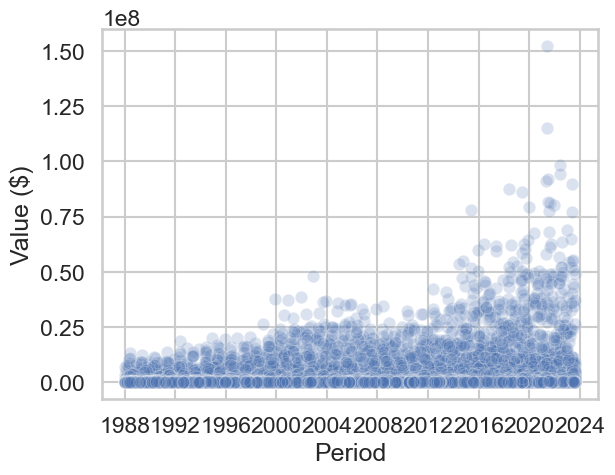

In [ ]:
sns.scatterplot(x=data['Period'], y=data['Value ($)'], alpha = 0.2)


### Testing univariate ARIMA

With only data from 1 country, for 1 commodity, using Quantity.


In [ ]:
# find country with most complete data accross time. most countries have great data since 2017

In [ ]:
data

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2015-12-01,"0306.12.10 - lobsters, in brine, frozen",Canada,United States,California,283504,14851,Weight in kilograms
1,2013-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,481092,26023,Weight in kilograms
2,2013-03-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,640859,27470,Weight in kilograms
3,2013-07-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,425309,15443,Weight in kilograms
4,2014-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,1166299,40278,Weight in kilograms
...,...,...,...,...,...,...,...,...
38857,1997-11-01,"1605.30.19 - lobster meat, not frozen, simply ...",Canada,Japan,NaN,17080,400,Weight in kilograms
38858,1995-12-01,"1605.30.11 - lobster meat, frozen, simply boil...",Canada,"Korea, South",NaN,38414,2200,Weight in kilograms
38859,2012-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Canada,"Korea, South",NaN,474,18,Weight in kilograms
38860,2012-11-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Canada,Taiwan,NaN,50,2,Weight in kilograms


In [ ]:
codes = ['0306.22.10', '0306.32.10']



In [ ]:
arima_test = filtered_df[filtered_df['Commodity'].str[:10].isin(codes)].sort_values(by='Period')
arima_test.groupby('Country').count().sort_values(by='Period', ascending = False)
# arima_test

,Period,Commodity,Quantity,Value ($)
Country,,,,
United States,6796,6796,6796,6796
Belgium,429,429,429,429
Hong Kong,429,429,429,429
United Kingdom,429,429,429,429
Japan,429,429,429,429
Netherlands,427,427,427,427
France,420,420,420,420
"Korea, South",403,403,403,403
Germany,395,395,395,395


In [ ]:
# filter for one country --- belgium as example
arima_test = arima_test.loc[arima_test['Country'] == 'Belgium']

In [ ]:
# drop cextra columns
arima_test.drop(columns=['Country', 'Value ($)'], inplace = True)
arima_test

,Period,Commodity,Quantity
6667,1988-01-01,"0306.22.10 - lobsters, (homarus spp), live (te...",43420
14656,1988-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",21503
14657,1988-03-01,"0306.22.10 - lobsters, (homarus spp), live (te...",32971
18666,1988-04-01,"0306.22.10 - lobsters, (homarus spp), live (te...",40879
30517,1988-05-01,"0306.22.10 - lobsters, (homarus spp), live (te...",54556
...,...,...,...
20606,2023-05-01,"0306.32.10 - lobsters, live",143663
28436,2023-06-01,"0306.32.10 - lobsters, live",126616
4468,2023-07-01,"0306.32.10 - lobsters, live",107495
24563,2023-08-01,"0306.32.10 - lobsters, live",93901


In [ ]:
# count records by year, check that there is no overlap
arima_test.groupby(arima_test['Period'].dt.year).count()

,Period,Commodity,Quantity
Period,,,
1988,12,12,12
1989,12,12,12
1990,12,12,12
1991,12,12,12
1992,12,12,12
1993,12,12,12
1994,12,12,12
1995,12,12,12
1996,12,12,12


In [ ]:
# arima_test = arima_test.drop(columns=['Commodity'])
arima_test = arima_test.reset_index(drop=True)
arima_test

,Period,Quantity
0,1988-01-01,43420
1,1988-02-01,21503
2,1988-03-01,32971
3,1988-04-01,40879
4,1988-05-01,54556
...,...,...
424,2023-05-01,143663
425,2023-06-01,126616
426,2023-07-01,107495
427,2023-08-01,93901


In [ ]:
import seaborn as sns

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/sea

<Axes: xlabel='Period', ylabel='Quantity'>

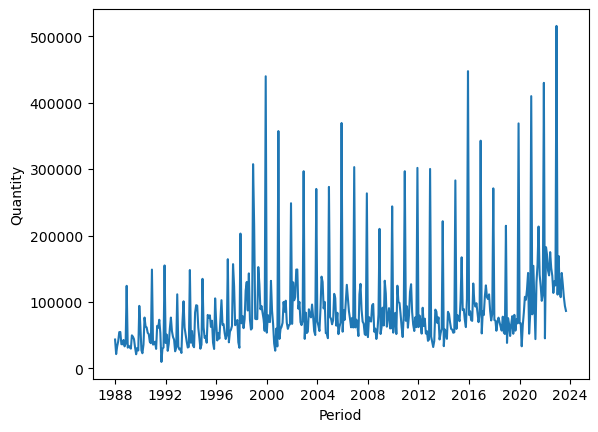

In [ ]:
sns.lineplot(x = arima_test['Period'], y=arima_test['Quantity'])

In [ ]:
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

In [ ]:
japan_data = japan_data[['Period','Quantity']]
japan_data

,Period,Quantity
21167,2017-01-01,51399
1054,2017-02-01,43290
25116,2017-03-01,66325
28983,2017-04-01,155992
13122,2017-05-01,64770
...,...,...
5093,2023-05-01,64209
13130,2023-06-01,34302
5094,2023-07-01,45870
1059,2023-08-01,48232


In [ ]:

japan_data = japan_data.groupby('Period').sum(['Quantity', 'Value ($)']).reset_index(drop=False)
japan_data['Value per kg'] = japan_data['Value ($)'] / japan_data['Quantity']
japan_data

,Period,Quantity,Value ($),Value per kg
0,1988-01-01,90624,1007314,11.115312
1,1988-02-01,43855,761646,17.367370
2,1988-03-01,39298,591710,15.057000
3,1988-04-01,46837,674126,14.393023
4,1988-05-01,110517,1210857,10.956296
...,...,...,...,...
424,2023-05-01,259394,6666975,25.702117
425,2023-06-01,384356,15155650,39.431282
426,2023-07-01,396867,12801880,32.257356
427,2023-08-01,97420,2188635,22.465972


In [ ]:
japan_data['Year'] = japan_data['Period'].dt.year
japan_data



,Period,Quantity,Value ($),Value per kg,Year
0,1988-01-01,90624,1007314,11.115312,1988
1,1988-02-01,43855,761646,17.367370,1988
2,1988-03-01,39298,591710,15.057000,1988
3,1988-04-01,46837,674126,14.393023,1988
4,1988-05-01,110517,1210857,10.956296,1988
...,...,...,...,...,...
424,2023-05-01,259394,6666975,25.702117,2023
425,2023-06-01,384356,15155650,39.431282,2023
426,2023-07-01,396867,12801880,32.257356,2023
427,2023-08-01,97420,2188635,22.465972,2023


### other

In [ ]:
japan_data_recent = japan_data.loc[japan_data['Period'] > '2020', :].reset_index(drop = True)
japan_data_recent

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/sea

<Axes: xlabel='Year', ylabel='Quantity'>

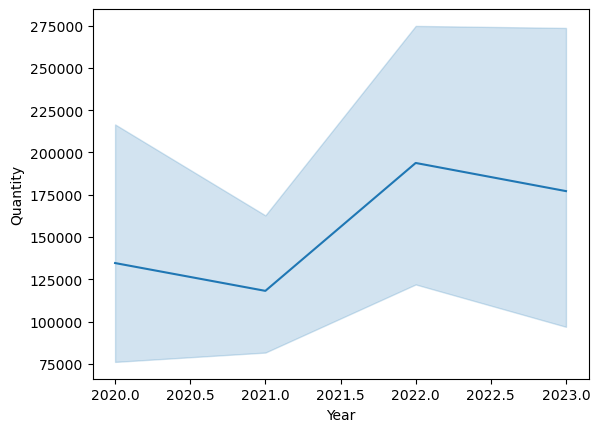

In [ ]:
sns.lineplot(x=japan_data_recent['Year'], y=japan_data_recent['Quantity'])

In [ ]:
data

,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
0,2015-12-01,"0306.12.10 - lobsters, in brine, frozen",Canada,United States,California,283504,14851,Weight in kilograms
1,2013-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,481092,26023,Weight in kilograms
2,2013-03-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,640859,27470,Weight in kilograms
3,2013-07-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,425309,15443,Weight in kilograms
4,2014-01-01,"0306.12.90 - lobsters, nes, frozen",Canada,United States,California,1166299,40278,Weight in kilograms
...,...,...,...,...,...,...,...,...
38857,1997-11-01,"1605.30.19 - lobster meat, not frozen, simply ...",Canada,Japan,NaN,17080,400,Weight in kilograms
38858,1995-12-01,"1605.30.11 - lobster meat, frozen, simply boil...",Canada,"Korea, South",NaN,38414,2200,Weight in kilograms
38859,2012-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Canada,"Korea, South",NaN,474,18,Weight in kilograms
38860,2012-11-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Canada,Taiwan,NaN,50,2,Weight in kilograms


/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/lhl_midterm_env/lib/python3.9/site-packages/sea

<Axes: xlabel='Period', ylabel='Value ($)'>

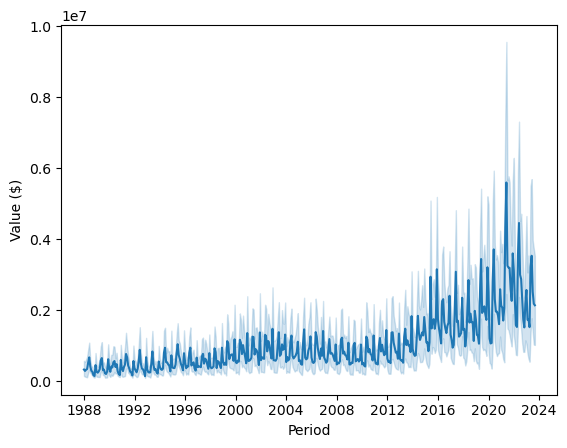

In [ ]:
sns.lineplot(x=data['Period'], y=data['Value ($)'])

# bin

dont need... got relevant HS codes another way

In [ ]:
hs_8 = pd.read_csv('data/codes_hs8.csv', sep = ',',skiprows = 1, engine='python', skipfooter = 5, index_col=False)
# hs_8 = pd.read_csv('codes_hs8.csv', sep = ',', skipfooter = 5)


In [ ]:
pd.set_option('display.max_colwidth', None)
hs_8['Commodity'] = hs_8['Commodity'].str.lower()

In [ ]:
hs_lobster = hs_8.loc[hs_8['Commodity'].str.contains('lobster'),:]

In [ ]:
hs_lobster['Commodity'].unique()

array(['1605.30.10 - lobster, prepared or preserved, frozen',
       '0306.32.10 - lobsters, live',
       '0306.12.90 - lobsters, nes, frozen',
       '0306.12.10 - lobsters, in brine, frozen',
       '1605.30.90 - lobster, prepared or preserved, nes',
       '0306.32.90 - lobsters, fresh or chilled, o/t live',
       '0306.11.00 - rock lobster & o sea crawfish,frz,in shell or not,incl in shell ckd in water,etc',
       '1605.30.20 - lobster, prepared or preserved, in cans, o/t frozen'],
      dtype=object)